In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
from sklearn.datasets import load_iris
dataset = load_iris()


In [4]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df['Class'] = dataset.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)


In [10]:
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)


In [13]:
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))


[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



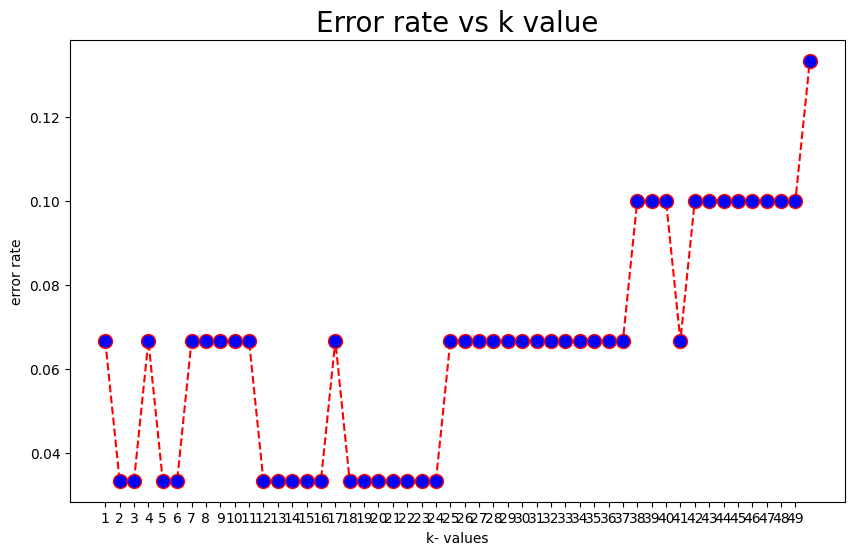

In [16]:
#comparing error rate with K value
error = []
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(10,6)) 
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) 
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values")
plt.ylabel("error rate")
plt.xticks(range(1,50))
plt.show()
